Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82        35
           1       1.00      0.40      0.57        25

    accuracy                           0.75        60
   macro avg       0.85      0.70      0.70        60
weighted avg       0.82      0.75      0.72        60



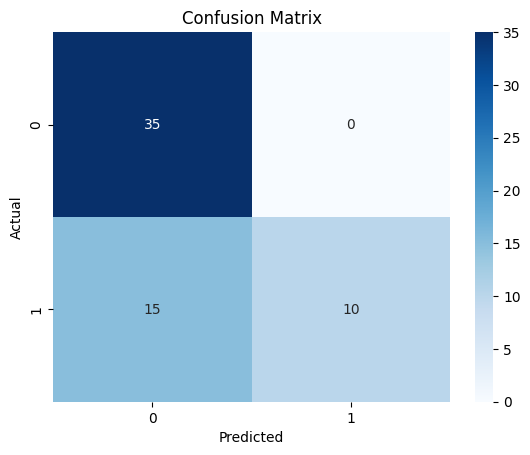

In [2]:

import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated sensor dataset
np.random.seed(42)
data_size = 200
temperature = np.random.normal(35, 3, data_size)
vibration = np.random.normal(0.5, 0.2, data_size)
weight = np.random.normal(500, 30, data_size)

# Simulate defects (label 1 = Defective, 0 = Pass)
labels = ((temperature > 38) | (vibration > 0.8) | (weight < 470)).astype(int)

# Create DataFrame
df = pd.DataFrame({
    'Temperature': temperature,
    'Vibration': vibration,
    'Weight': weight,
    'Label': labels
})

# Splitting the data
X = df[['Temperature', 'Vibration', 'Weight']]
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Train SVM model
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()